In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

## Preprocessing: Detect Face and Eyes with Haar Cascade

In [3]:
img = cv2.imread('./data/test_images/image_1.jpg')
img.shape

(168, 300, 3)

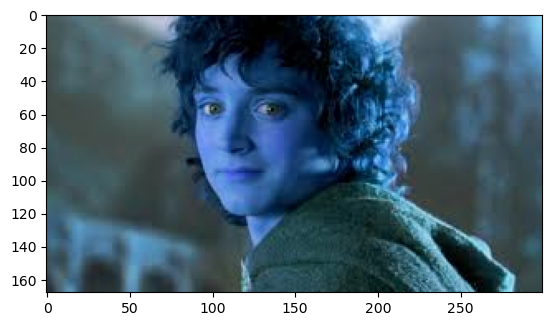

In [4]:
plt.imshow(img)
plt.show()

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(168, 300)

In [6]:
gray

array([[ 91,  91,  92, ..., 206, 210, 212],
       [ 91,  91,  91, ..., 206, 210, 212],
       [ 90,  90,  90, ..., 206, 210, 212],
       ...,
       [ 50,  50,  52, ...,  68,  69,  69],
       [ 48,  48,  49, ...,  68,  68,  68],
       [ 48,  47,  48, ...,  67,  68,  68]], dtype=uint8)

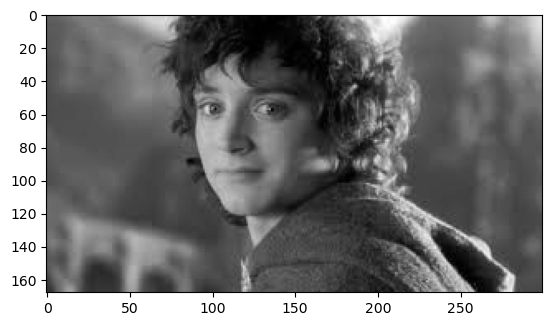

In [7]:
plt.imshow(gray, cmap='gray')
plt.show()

In [8]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

In [9]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[78, 30, 74, 74]])

In [10]:
(x, y, w, h) = faces[0]
x, y, w, h

(78, 30, 74, 74)

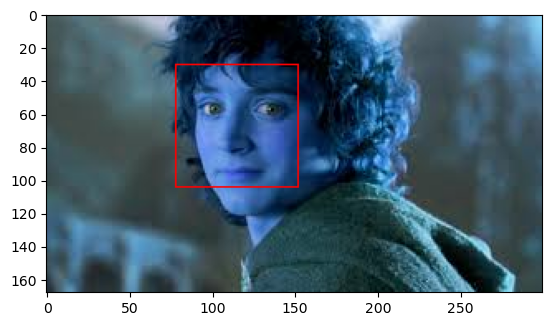

In [11]:
cv2.destroyAllWindows()
face_img = cv2.rectangle(img,(x, y), (x + w, y + h),(255, 0, 0), 1)
plt.imshow(face_img)
plt.show()

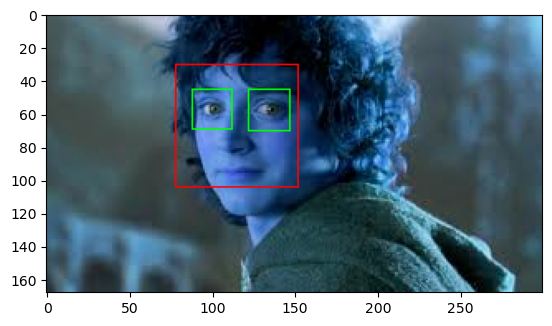

In [12]:
cv2.destroyAllWindows()
for (x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 1)
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = face_img[y: y + h, x: x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 1)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

## Preprocessing: Crop the Facial Region of Image

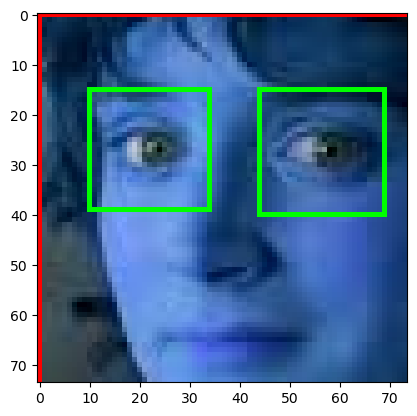

In [14]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')
plt.show()

## Preprocessing: Save Cropped Facial Region if Eyes >= 2

In [16]:
def get_cropped_image_if_2_eyes (image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y: y + h, x: x + w]
        roi_color = img[y: y + h, x: x + w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

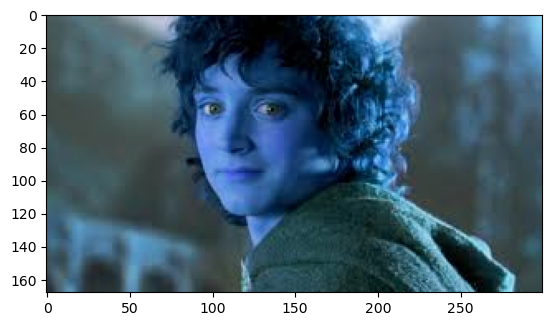

In [17]:
original_image = cv2.imread('./data/test_images/image_1.jpg')
plt.imshow(original_image)
plt.show()

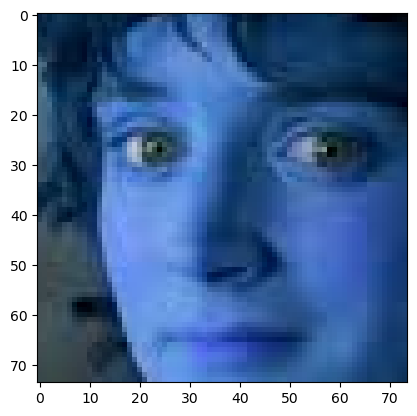

In [18]:
cropped_img = get_cropped_image_if_2_eyes('./data/test_images/image_1.jpg')
plt.imshow(cropped_img)
plt.show()

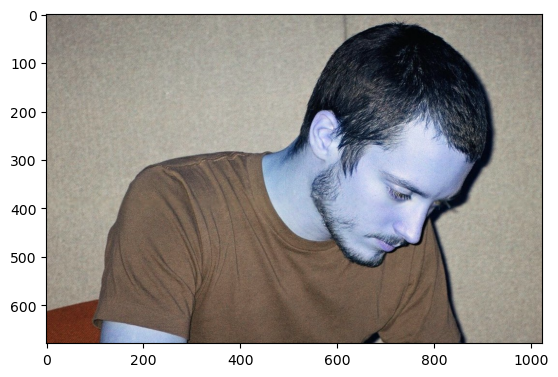

In [19]:
orginal_image_obstructed = cv2.imread('./data/test_images/image_2.jpg')
plt.imshow(orginal_image_obstructed)
plt.show()

In [20]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./data/test_images/image_2.jpg')
cropped_image_no_2_eyes

In [21]:
path_to_data = "./data/dataset/"
path_to_cropped_data = "./data/cropped_images/"

In [22]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [23]:
img_dirs

['./data/dataset/billy_boyd',
 './data/dataset/dominic_monaghan',
 './data/dataset/elijah_wood',
 './data/dataset/martin_freeman',
 './data/dataset/sean_astin']

In [24]:
import shutil
if os.path.exists(path_to_cropped_data):
    shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data)

In [25]:
cropped_image_dirs = []
hobbit_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    hobbit_name = img_dir.split('/')[-1]
    hobbit_file_names_dict[hobbit_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cropped_data + hobbit_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
            cropped_file_name = hobbit_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            hobbit_file_names_dict[hobbit_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./data/cropped_images/billy_boyd
Generating cropped images in folder:  ./data/cropped_images/dominic_monaghan
Generating cropped images in folder:  ./data/cropped_images/elijah_wood
Generating cropped images in folder:  ./data/cropped_images/martin_freeman
Generating cropped images in folder:  ./data/cropped_images/sean_astin


## Preprocessing: Use Wavelet Transform to Extract Facial Features

In [27]:
import numpy as np
import pywt
import cv2    

# From stackoverflow
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

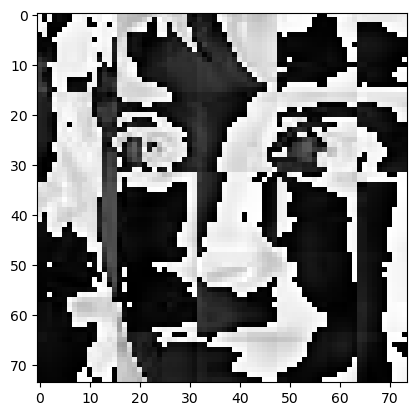

In [28]:
img_har = w2d(cropped_img,'db1',4)
plt.imshow(img_har, cmap='gray')
plt.show()

In [29]:
hobbit_file_names_dict

{'billy_boyd': ['./data/cropped_images/billy_boyd/billy_boyd1.png',
  './data/cropped_images/billy_boyd/billy_boyd2.png',
  './data/cropped_images/billy_boyd/billy_boyd3.png',
  './data/cropped_images/billy_boyd/billy_boyd4.png',
  './data/cropped_images/billy_boyd/billy_boyd5.png',
  './data/cropped_images/billy_boyd/billy_boyd6.png',
  './data/cropped_images/billy_boyd/billy_boyd7.png',
  './data/cropped_images/billy_boyd/billy_boyd8.png',
  './data/cropped_images/billy_boyd/billy_boyd9.png',
  './data/cropped_images/billy_boyd/billy_boyd10.png',
  './data/cropped_images/billy_boyd/billy_boyd11.png',
  './data/cropped_images/billy_boyd/billy_boyd12.png',
  './data/cropped_images/billy_boyd/billy_boyd13.png',
  './data/cropped_images/billy_boyd/billy_boyd14.png',
  './data/cropped_images/billy_boyd/billy_boyd15.png',
  './data/cropped_images/billy_boyd/billy_boyd16.png',
  './data/cropped_images/billy_boyd/billy_boyd17.png',
  './data/cropped_images/billy_boyd/billy_boyd18.png',
  './

In [30]:
class_dict = {}
count = 0
for hobbit_name in hobbit_file_names_dict.keys():
    class_dict[hobbit_name] = count
    count = count + 1
class_dict

{'billy_boyd': 0,
 'dominic_monaghan': 1,
 'elijah_wood': 2,
 'martin_freeman': 3,
 'sean_astin': 4}

In [64]:
X, y = [], []

for hobbit_name, training_files in hobbit_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',4)
        scaled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[hobbit_name])

In [65]:
len(X)

234

In [68]:
# Avoid sklearn int warnings
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(234, 4096)